In [50]:
import random

import numpy as np
import pandas as pd

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

from pyrl.environments import DiceRolling, BetDiceRolling
from pyrl.agents import Agent
from pyrl.exp import Experiment

from pyrl.tools import State, Action, DiscreteState, DiscreteAction
from pyrl.tabular import Q
from pyrl.tabular.algorithms import q_learning, mc_control

from tqdm.notebook import tqdm


from typing import List, Callable

In [51]:
def epsilon_greedy(policy, epsilon):
    def wrapper(state, available_actions):
        greedy_action = policy(state, available_actions)

        if random.random() <= epsilon:
            return random.choice(available_actions)
        
        return greedy_action
    return wrapper


def random_policy(state, available_actions):
    return random.choice(available_actions)

### Q-Learning

In [52]:
environment = DiceRolling()

exp = Experiment(environment)

q = Q(*environment.spaces())

In [53]:
N = 1000000

e0 = 0.3
eN = 0.001

cf = np.log(e0 / eN) / N

E = lambda n: e0 * np.exp(-cf * n)

In [54]:
agent = Agent(epsilon_greedy(q.to_policy(), E(0)))

q_learining_rewards = []
for n in tqdm(range(N)):
    # run episode 
    history = exp.run(agent)

    q_learining_rewards.append(np.sum([tr[2] for tr in history]))

    # update values of Q function
    q = q_learning(q, history)

    # change agent's policy
    agent.change_policy(epsilon_greedy(q.to_policy(), E(n)))

  0%|          | 0/1000000 [00:00<?, ?it/s]

### MC Control

In [55]:
environment = DiceRolling()

exp = Experiment(environment)

q = Q(*environment.spaces())

In [56]:
N = 1000000

e0 = 0.3
eN = 0.001

cf = np.log(e0 / eN) / N

E = lambda n: e0 * np.exp(-cf * n)

In [57]:
agent = Agent(epsilon_greedy(q.to_policy(), E(0)))

mc_control_rewards = []
for n in tqdm(range(N)):
    # run episode 
    history = exp.run(agent)

    mc_control_rewards.append(np.sum([tr[2] for tr in history]))

    # update values of Q function
    q = mc_control(q, history)

    # change agent's policy
    agent.change_policy(epsilon_greedy(q.to_policy(), E(n)))

  0%|          | 0/1000000 [00:00<?, ?it/s]

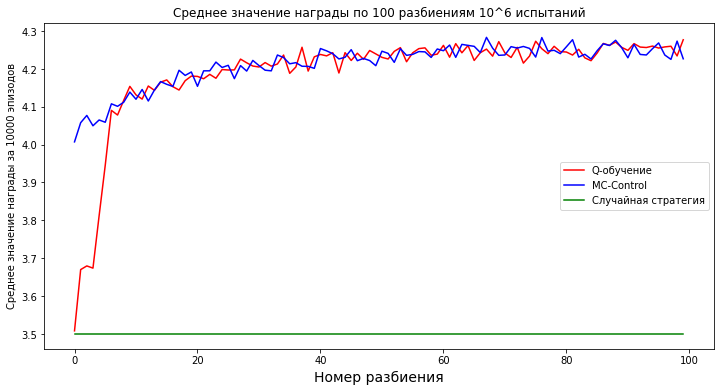

In [58]:
splitted_q_learining_rewards = np.split(np.array(q_learining_rewards), 100)
splitted_q_learining_rewards = list(map(np.mean, splitted_q_learining_rewards))

splitted_mc_control_rewards = np.split(np.array(mc_control_rewards), 100)
splitted_mc_control_rewards = list(map(np.mean, splitted_mc_control_rewards))

plt.subplots(figsize=(12, 6))

plt.plot(splitted_q_learining_rewards, c='r', label="Q-обучение")
plt.plot(splitted_mc_control_rewards, c='blue', label="MC-Control")

plt.plot([3.5] * len(splitted_mc_control_rewards), c='g', label="Случайная стратегия")

plt.title("Среднее значение награды по 100 разбиениям 10^6 испытаний")

plt.xlabel("Номер разбиения", size=14)
plt.ylabel("Среднее значение награды за 10000 эпизодов")

plt.legend()
plt.show()